In [10]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

df_21322_14 = pd.read_excel("analiza_jazdy_na_biegu_wstecznym/21322_data_table_full_2024-10-14.xlsx")  
df_21322_15 = pd.read_excel("analiza_jazdy_na_biegu_wstecznym/21322_data_table_full_2024-10-15.xlsx")  
df_21572_09 = pd.read_excel("analiza_jazdy_na_biegu_wstecznym/21572_data_table_full_2024-10-09.xlsx")  
df_21572_10 = pd.read_excel("analiza_jazdy_na_biegu_wstecznym/21572_data_table_full_2024-10-10.xlsx")  
df_21169_15 = pd.read_excel("analiza_jazdy_na_biegu_wstecznym/2305221        21169_data_table_full_2024-10-15.xlsx")   



In [11]:
print(df_21572_10["Active gear"].unique())
df_21572_10["Active gear"] = pd.to_numeric(df_21572_10["Active gear"], errors='coerce')
df_21572_10 = df_21572_10.dropna(subset=["Active gear"])
print(df_21572_10["Active gear"].unique())

[0 1 2 -1 3 4 5 6 '_2']
[ 0.  1.  2. -1.  3.  4.  5.  6.]


In [12]:
# przebiegi, prędkości, lokalizacje, czas trwania, liczba przypadków jazdy na wstecznym biegu, a także odniesienie do innych parametrów, np. masy pojazdu.
for revarse_drive_data in [df_21322_14, df_21322_15, df_21572_09, df_21572_10, df_21169_15]:
    revarse_drive_data = revarse_drive_data[
        (revarse_drive_data["longitude"] > 9.5) &
        (revarse_drive_data["Active gear"] < 0)
    ]
    revarse_drive_data = revarse_drive_data[["Date time","Velocity [km/h]", "Vehicle mass [kg]","TP Up", "TP Down", "PP Close", "PP Open", "distance_m"]]
    display(revarse_drive_data.describe())
    # display(revarse_drive_data)



,Date time,Velocity [km/h],Vehicle mass [kg],TP Up,TP Down,PP Close,PP Open,distance_m
count,1150,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000
mean,2024-10-14 10:01:06.177391360,3.218130,20285.580201,0.072174,0.011304,0.025217,0.008696,0.893861
min,2024-10-14 06:03:08,0.000000,16500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024-10-14 07:22:36.249999872,1.767000,18227.902000,0.000000,0.000000,0.000000,0.000000,0.490000
50%,2024-10-14 10:30:01.500000,3.252500,20842.966500,0.000000,0.000000,0.000000,0.000000,0.900000
75%,2024-10-14 11:37:53.750000128,4.924250,21996.133500,0.000000,0.000000,0.000000,0.000000,1.367500
max,2024-10-14 17:52:50,7.749000,23114.853000,1.000000,1.000000,1.000000,1.000000,2.150000
std,NaN,1.982553,2016.895983,0.258888,0.105765,0.156853,0.092885,0.550683


,Date time,Velocity [km/h],Vehicle mass [kg],TP Up,TP Down,PP Close,PP Open,distance_m
count,1296,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000
mean,2024-10-15 09:24:15.304012288,3.829173,17960.839470,0.102623,0.019290,0.037037,0.006944,1.063696
min,2024-10-15 07:01:08,0.000000,16285.771000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024-10-15 07:31:04.750000128,2.890000,16515.375250,0.000000,0.000000,0.000000,0.000000,0.800000
50%,2024-10-15 08:52:54.500000,4.271000,17915.197500,0.000000,0.000000,0.000000,0.000000,1.190000
75%,2024-10-15 09:56:09.249999872,4.969000,18780.904250,0.000000,0.000000,0.000000,0.000000,1.380000
max,2024-10-15 18:09:13,7.476000,21059.922000,1.000000,1.000000,1.000000,1.000000,2.080000
std,NaN,1.657123,1285.329395,0.303584,0.137596,0.188925,0.083076,0.460243


,Date time,Velocity [km/h],Vehicle mass [kg],TP Up,TP Down,PP Close,PP Open,distance_m
count,761,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000
mean,2024-10-09 10:33:12.363994624,3.669054,19574.024541,0.155059,0.039422,0.077530,0.081472,1.018975
min,2024-10-09 06:32:05,0.000000,16250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024-10-09 07:29:26,2.180000,16647.231000,0.000000,0.000000,0.000000,0.000000,0.610000
50%,2024-10-09 09:53:33,3.662000,20660.736000,0.000000,0.000000,0.000000,0.000000,1.020000
75%,2024-10-09 12:44:32,5.331000,21479.044000,0.000000,0.000000,0.000000,0.000000,1.480000
max,2024-10-09 17:20:40,7.188000,22880.764000,1.000000,1.000000,1.000000,1.000000,2.000000
std,NaN,2.094296,2422.386270,0.362199,0.194724,0.267606,0.273738,0.581654


,Date time,Velocity [km/h],Vehicle mass [kg],TP Up,TP Down,PP Close,PP Open,distance_m
count,709,675.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,2024-10-10 11:09:09.339915520,2.638941,20462.411478,0.348378,0.052186,0.104372,0.035261,0.747461
min,2024-10-10 05:54:05,0.000000,16610.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024-10-10 10:00:02,0.000000,19243.862000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2024-10-10 10:37:40,2.827000,21307.889000,0.000000,0.000000,0.000000,0.000000,0.810000
75%,2024-10-10 11:34:52,4.167500,21748.576000,1.000000,0.000000,0.000000,0.000000,1.180000
max,2024-10-10 18:10:14,7.297000,22238.107000,1.000000,1.000000,1.000000,1.000000,2.030000
std,NaN,2.087111,1737.257560,0.476793,0.222559,0.305959,0.184569,0.579048


,Date time,Velocity [km/h],Vehicle mass [kg],TP Up,TP Down,PP Close,PP Open,distance_m
count,527,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,2024-10-15 11:43:55.056925952,3.358732,19082.408397,0.352941,0.176471,0.222011,0.123340,0.932789
min,2024-10-15 07:44:37,0.000000,16470.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024-10-15 08:15:46.500000,2.578000,18230.160000,0.000000,0.000000,0.000000,0.000000,0.720000
50%,2024-10-15 09:27:02,3.397000,18925.116000,0.000000,0.000000,0.000000,0.000000,0.940000
75%,2024-10-15 17:55:27.500000,4.405000,20323.662500,1.000000,0.000000,0.000000,0.000000,1.225000
max,2024-10-15 18:27:08,6.466000,22755.053000,1.000000,1.000000,1.000000,1.000000,1.800000
std,NaN,1.483898,1718.300887,0.478339,0.381582,0.415994,0.329139,0.412167


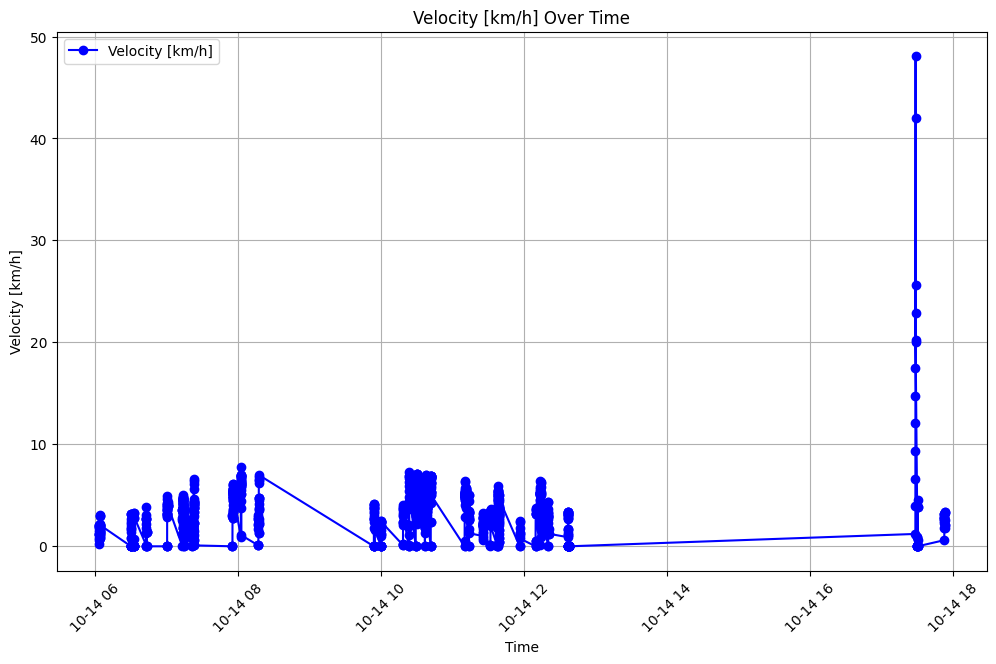

In [13]:
RD_date_velocity = df_21322_14[df_21322_14["Active gear"] < 0]
RD_date_velocity = RD_date_velocity[["Date time","Velocity [km/h]"]]

plt.figure(figsize=(12, 7))
plt.plot(RD_date_velocity["Date time"], RD_date_velocity["Velocity [km/h]"], 
         marker='o', linestyle='-', label="Velocity [km/h]", color='b')

plt.xlabel("Time")
plt.ylabel("Velocity [km/h]")
plt.title("Velocity [km/h] Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [14]:
RD_date_velocity_over_30 = df_21322_14[
    (df_21322_14["longitude"] > 9.5) &
    (df_21322_14["Active gear"] < 0)
]
#  (df_21322_14["Velocity [km/h]"] > 20)
RD_date_velocity_over_30 = RD_date_velocity_over_30[["Date time","Velocity [km/h]","longitude","latitude"]]
display(RD_date_velocity_over_30)

,Date time,Velocity [km/h],longitude,latitude
314,2024-10-14 06:03:08,0.199,10.000,53.460
315,2024-10-14 06:03:09,1.190,10.000,53.460
316,2024-10-14 06:03:10,1.190,10.000,53.460
317,2024-10-14 06:03:11,1.166,10.000,53.460
318,2024-10-14 06:03:12,1.096,10.000,53.460
...,...,...,...,...
42892,2024-10-14 17:52:46,3.264,10.001,53.461
42893,2024-10-14 17:52:47,2.597,10.001,53.461
42894,2024-10-14 17:52:48,1.790,10.001,53.461
42895,2024-10-14 17:52:49,2.063,10.001,53.461


In [16]:
reversed_results = []
df_21322_14["File_name"] = "21322_14"
df_21322_15["File_name"] = "21322_15"
df_21572_09["File_name"] = "21572_09"
df_21572_10["File_name"] = "21572_10"
df_21169_15["File_name"] = "21169_15"

for revarse_drive_data in [df_21322_14, df_21322_15, df_21572_09, df_21572_10, df_21169_15]:
    revarse_drive_data = revarse_drive_data[
        (revarse_drive_data["longitude"] > 9.5)
    ]
    grouped = revarse_drive_data.groupby("File_name")["Velocity [km/h]"].agg(["min", "max", "mean"])
    reversed_results.append(grouped)

for revarse_drive_data in [df_21322_14, df_21322_15, df_21572_09, df_21572_10, df_21169_15]:
    revarse_drive_data = revarse_drive_data[
        (revarse_drive_data["longitude"] > 9.5) &
        (revarse_drive_data["Active gear"] < 0)
    ]
    grouped = revarse_drive_data.groupby("File_name")["Velocity [km/h]"].agg(["min", "max", "mean"])
    reversed_results.append(grouped)

display(reversed_results)


[           min     max      mean
 File_name                       
 21322_14   0.0  90.538  5.783621,
            min     max      mean
 File_name                       
 21322_15   0.0  90.289  8.200188,
            min     max      mean
 File_name                       
 21572_09   0.0  58.605  5.382488,
            min     max      mean
 File_name                       
 21572_10   0.0  56.031  4.236501,
            min     max      mean
 File_name                       
 21169_15   0.0  90.858  5.193942,
            min    max     mean
 File_name                     
 21322_14   0.0  7.749  3.21813,
            min    max      mean
 File_name                      
 21322_15   0.0  7.476  3.829173,
            min    max      mean
 File_name                      
 21572_09   0.0  7.188  3.669054,
            min    max      mean
 File_name                      
 21572_10   0.0  7.297  2.638941,
            min    max      mean
 File_name                      
 21169_15   0.0  6.466

In [ ]:
for revarse_drive_data in [df_21322_14, df_21322_15, df_21572_09, df_21572_10, df_21169_15]:
    revarse_drive_data = revarse_drive_data[
        (revarse_drive_data["longitude"] > 9.5) &
        (revarse_drive_data["Active gear"] < 0)
    ]
    display(revarse_drive_data["Fuel level"].describe())

count    1150.000000
mean       89.552696
std        10.832269
min        33.600000
25%        88.000000
50%        91.200000
75%        95.600000
max        96.800000
Name: Fuel level, dtype: float64

count    1296.000000
mean       74.674074
std         4.339472
min        58.800000
25%        73.200000
50%        77.600000
75%        78.000000
max        78.000000
Name: Fuel level, dtype: float64

count    761.000000
mean      56.856242
std        5.060600
min       46.400000
25%       53.600000
50%       58.000000
75%       62.400000
max       64.000000
Name: Fuel level, dtype: float64

count    675.000000
mean      38.229926
std        4.225034
min       29.600000
25%       35.600000
50%       38.800000
75%       38.800000
max       45.200000
Name: Fuel level, dtype: float64

count    527.000000
mean      56.572296
std        4.700464
min       49.200000
25%       50.400000
50%       58.800000
75%       59.200000
max       64.000000
Name: Fuel level, dtype: float64